## Logistic Regression with Python¶
## For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

## We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

## We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\Titanic\\titanic_train.csv')

In [3]:
print(df.shape)
for i in df.columns:
    print('-------------------------------------------------------------------------------------------------------------------')
    print(i+':')
    print(df[i].value_counts())

(891, 12)
-------------------------------------------------------------------------------------------------------------------
PassengerId:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Survived:
0    549
1    342
Name: Survived, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Name:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
              

# Continious variable :

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Continious=['Fare','Age']

In [6]:
for i in Continious:
    print('---------------------------------------------------------------------------------------------------------------------')
    print(i+":")
    print('number of null in "{}" is :'.format(i),df[i].isnull().sum())

---------------------------------------------------------------------------------------------------------------------
Fare:
number of null in "Fare" is : 0
---------------------------------------------------------------------------------------------------------------------
Age:
number of null in "Age" is : 177


<AxesSubplot:>

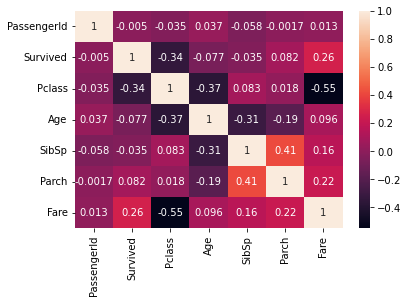

In [7]:
sns.heatmap(df.corr(),annot=True)

## "Age is Highly corellated with Passenger class"

## Age vs Passenger Class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

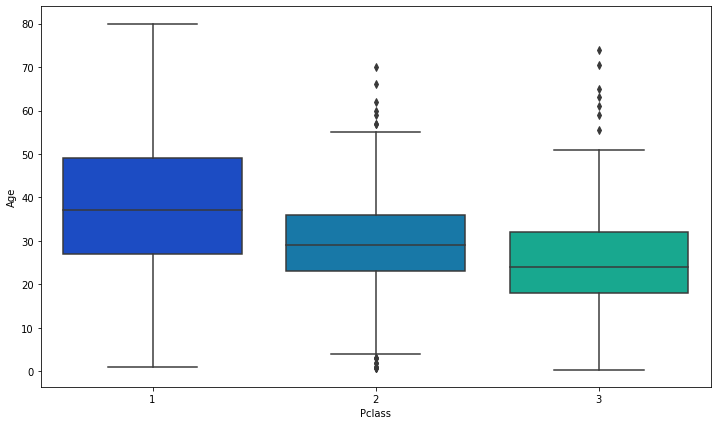

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [9]:
df.Age.groupby(df.Pclass).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [10]:
df.Age.groupby(df.Pclass).describe()['50%']

Pclass
1    37.0
2    29.0
3    24.0
Name: 50%, dtype: float64

In [11]:
df_age=df[['Pclass','Age']]

In [107]:
df_age

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [108]:
df_age.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [12]:
a1=37
a2=29
a3=24
marker=0
for i in df_age.Age.isnull():
    if i:
        print('row number:',marker)
        print('passenger class:',df_age.iloc[marker,0])
        print(i)
    marker=marker+1    
        
    

row number: 5
passenger class: 3
True
row number: 17
passenger class: 2
True
row number: 19
passenger class: 3
True
row number: 26
passenger class: 3
True
row number: 28
passenger class: 3
True
row number: 29
passenger class: 3
True
row number: 31
passenger class: 1
True
row number: 32
passenger class: 3
True
row number: 36
passenger class: 3
True
row number: 42
passenger class: 3
True
row number: 45
passenger class: 3
True
row number: 46
passenger class: 3
True
row number: 47
passenger class: 3
True
row number: 48
passenger class: 3
True
row number: 55
passenger class: 1
True
row number: 64
passenger class: 1
True
row number: 65
passenger class: 3
True
row number: 76
passenger class: 3
True
row number: 77
passenger class: 3
True
row number: 82
passenger class: 3
True
row number: 87
passenger class: 3
True
row number: 95
passenger class: 3
True
row number: 101
passenger class: 3
True
row number: 107
passenger class: 3
True
row number: 109
passenger class: 3
True
row number: 121
passeng

In [13]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'),inplace=True)

-----------------------------------------------------------------------------------------------------------------
Fare:


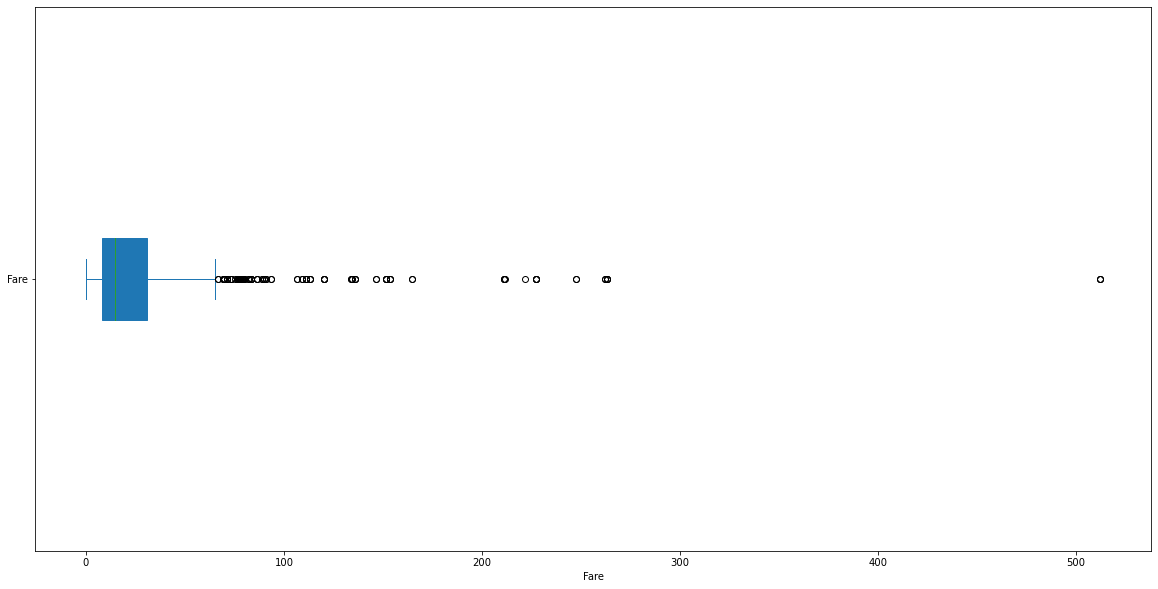

left limit:-26.724
right limit:65.6344
iqr:23.0896
The total number of records are:891
The number of outliers are: 116
The total percentage of outliers are: 13.019079685746352 %
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace65


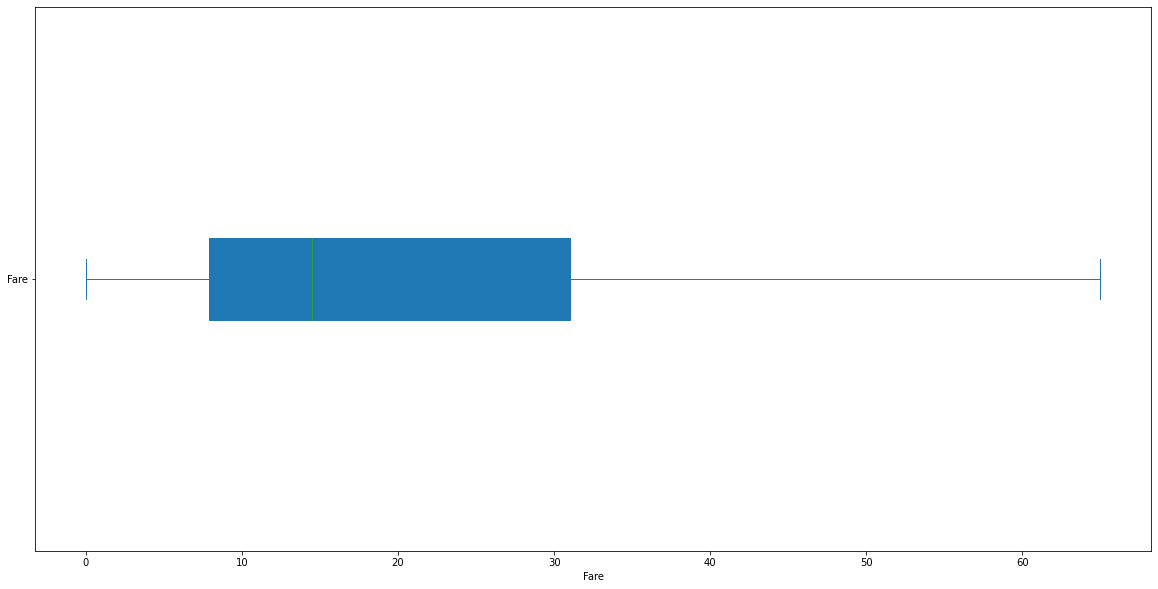

-----------------------------------------------------------------------------------------------------------------
Age:


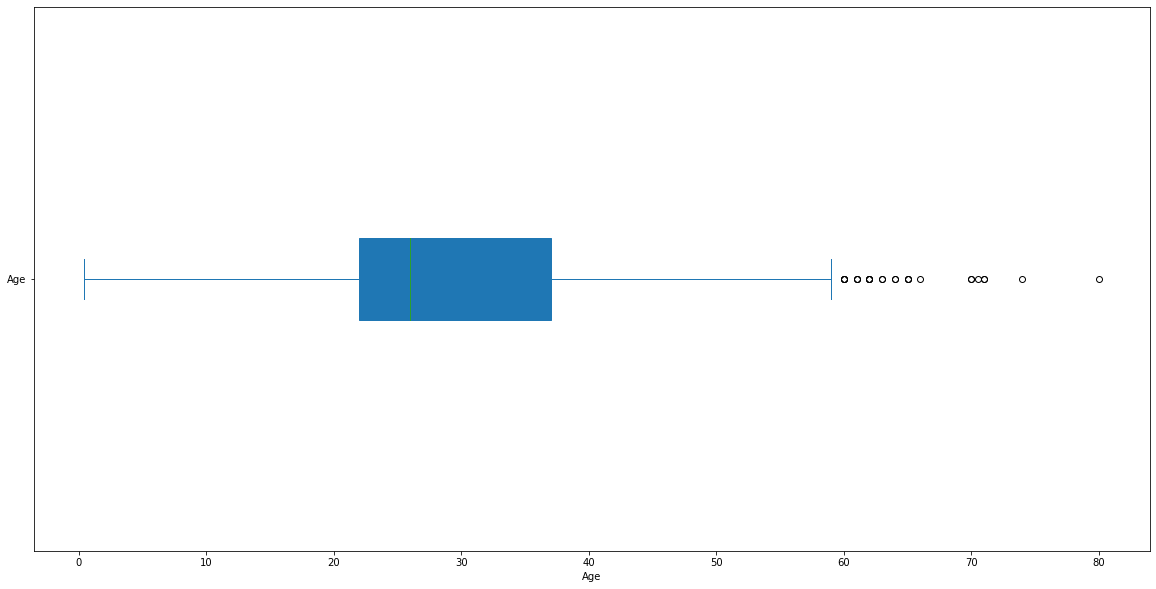

left limit:-0.5
right limit:59.5
iqr:15.0
The total number of records are:891
The number of outliers are: 26
The total percentage of outliers are: 2.9180695847362514 %
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


In [15]:
for i in Continious:
    print('-----------------------------------------------------------------------------------------------------------------')
    print(i+":")
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= df[i].describe()['75%']-df[i].describe()['25%']
    right_lim=df[i].quantile(0.75)+1.5*iqr
    leftt_lim=df[i].quantile(0.25)-1.5*iqr
    total=len(df[i])
    outlier=len(df[i][(df[i]<leftt_lim)|(df[i]>right_lim)])
    per=outlier/total
    print("left limit:{}".format(leftt_lim))
    print("right limit:{}".format(right_lim))
    print("iqr:{}".format(iqr))
    print('The total number of records are:{}'.format(len(df[i])))
    print('The number of outliers are:',len(df[i][(df[i]<leftt_lim)|(df[i]>right_lim)]))
    print('The total percentage of outliers are:',per*100,'%')

    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('by what number do you want to replace'))
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=float(input('by what number do you want to replace'))
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='no':
        pass
    if a=='left' or a=='right' or a=='both':
        plt.figure(figsize=(20,10))
        df[i].plot.box(vert=False,patch_artist=True)
        plt.xlabel(i)
        plt.show()

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf
import colorama
from colorama import Fore

for i in Continious:
    print("-------------------------------------------------------------------------------------------------------------------")
    print(i+":\n")
    print('ANOVA:\n')
    mod=ols(i+'~Survived',data=df).fit()
    aov_table=smf.stats.anova_lm(mod,type = 2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both survived group and not survived group\n')
        print("p_val = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both survived group and not survived group\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.Survived,alpha=0.05)
        print(tukey,'\n')
        
       

-------------------------------------------------------------------------------------------------------------------
Fare:

ANOVA:

             df         sum_sq       mean_sq          F        PR(>F)
Survived    1.0   37037.571704  37037.571704  99.706145  2.516197e-22
Residual  889.0  330234.421181    371.467290        NaN           NaN 

Pvalue=2.516196789750214e-22

TUKEY:

'Fare' is a 'good Predictor'

Avg of this feature is not same for both survived group and not survived group

we need to perform Tuckey as atleast one category is different

'Fare' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  13.2575   0.0 10.6517 15.8633   True
--------------------------------------------------- 

-------------------------------------------------------------------------------------------------------------------
Age:

ANOVA:

             df        

In [17]:
df.drop(['Age'],1,inplace=True)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\1998184320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Age'],1,inplace=True)


In [18]:
Continious.remove('Age')

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,65.000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.000,C148,C


# Categorical variable :

In [20]:
categorical=list(set(df.columns)-set(Continious))

In [21]:
for i in categorical:
    print('---------------------------------------------------------------------------------------------------------------------')
    print(i+":")
    print('number of null in "{}" is :'.format(i),df[i].isnull().sum())

---------------------------------------------------------------------------------------------------------------------
Embarked:
number of null in "Embarked" is : 2
---------------------------------------------------------------------------------------------------------------------
Pclass:
number of null in "Pclass" is : 0
---------------------------------------------------------------------------------------------------------------------
Survived:
number of null in "Survived" is : 0
---------------------------------------------------------------------------------------------------------------------
Ticket:
number of null in "Ticket" is : 0
---------------------------------------------------------------------------------------------------------------------
Cabin:
number of null in "Cabin" is : 687
---------------------------------------------------------------------------------------------------------------------
PassengerId:
number of null in "PassengerId" is : 0
----------------------

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:
categorical.remove('Cabin')

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
categorical

['Embarked',
 'Pclass',
 'Survived',
 'Ticket',
 'PassengerId',
 'Parch',
 'Sex',
 'Name',
 'SibSp']

Embarked:


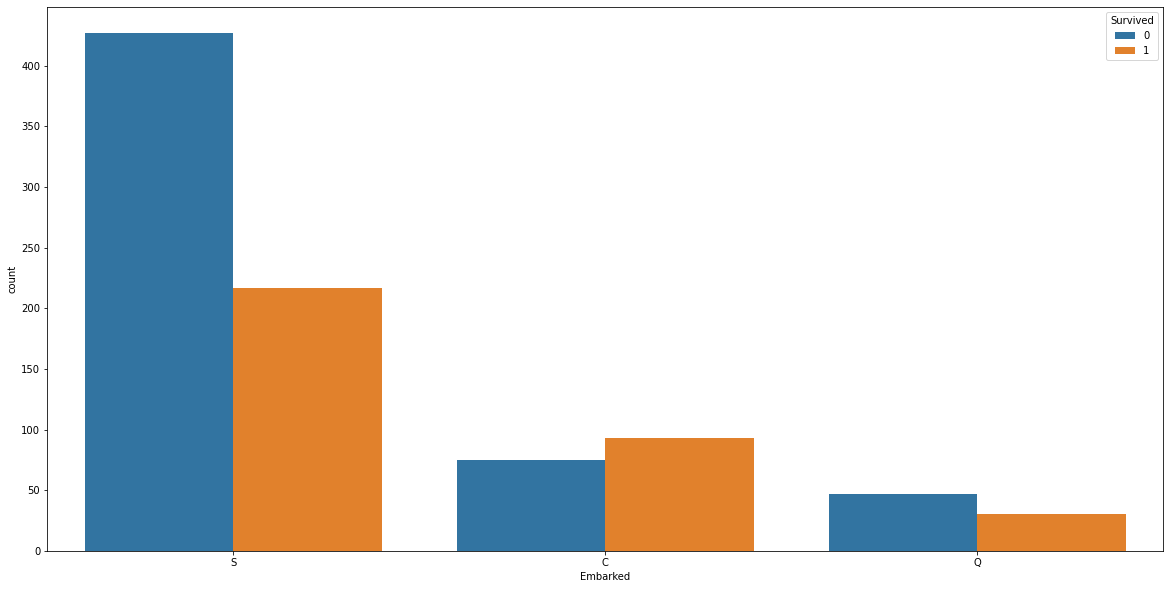

'Embarked' is a 'Good Predictor'
p_val = 1.769922284120912e-06

Pclass:


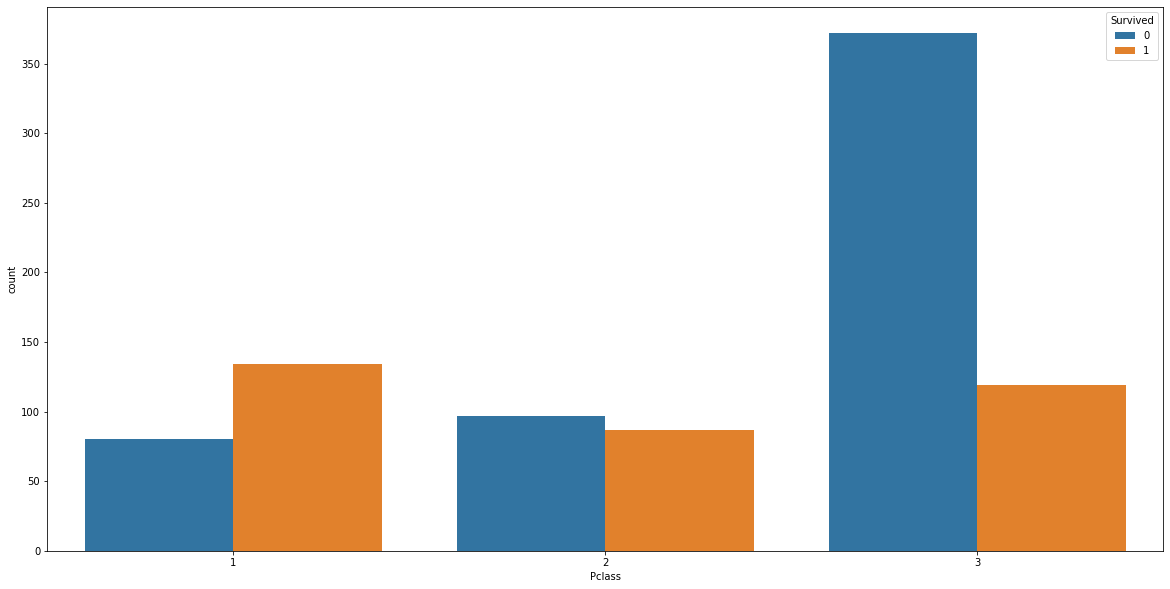

'Pclass' is a 'Good Predictor'
p_val = 1.1813624785477922e-22

Survived:


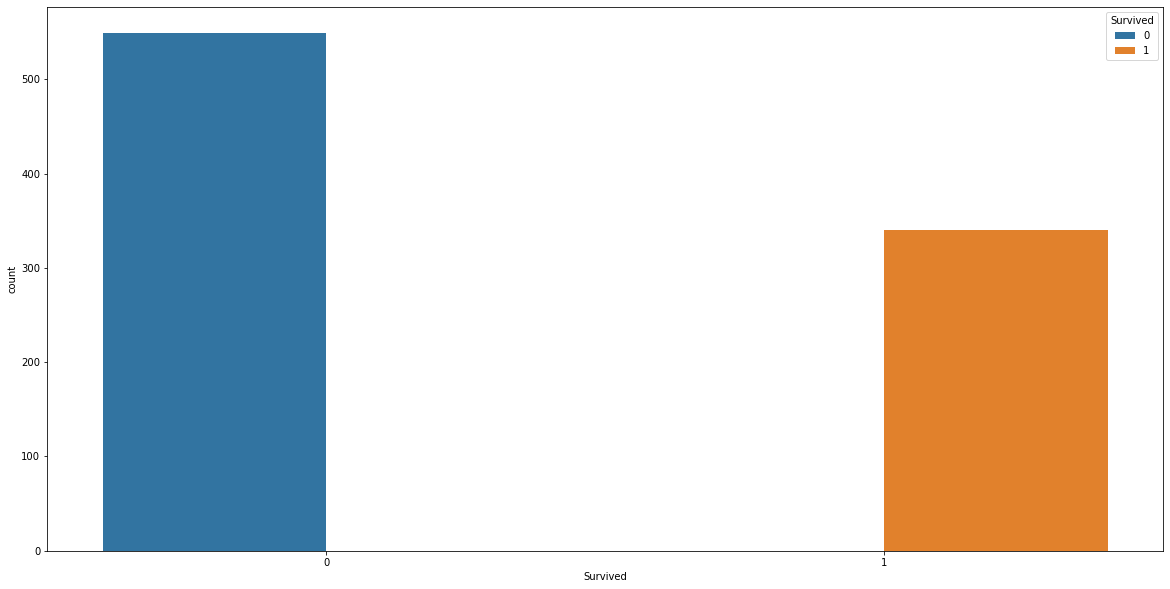

'Survived' is a 'Good Predictor'
p_val = 2.4160438987070603e-195

Ticket:


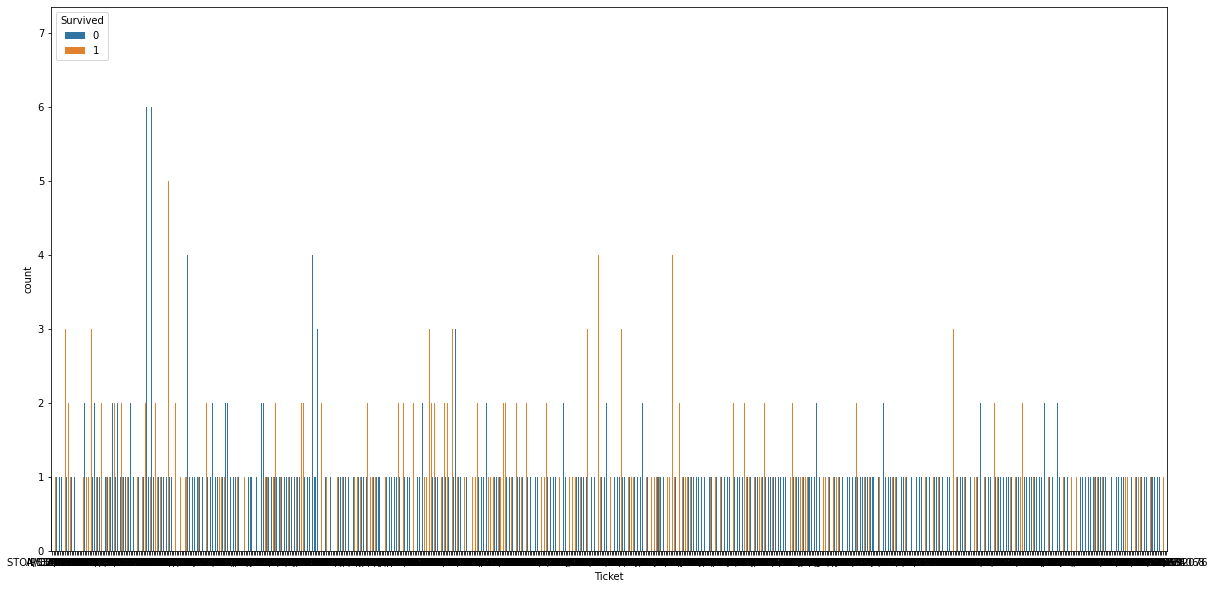

'Ticket' is a 'Good Predictor'
p_val = 0.012392920285386588

PassengerId:


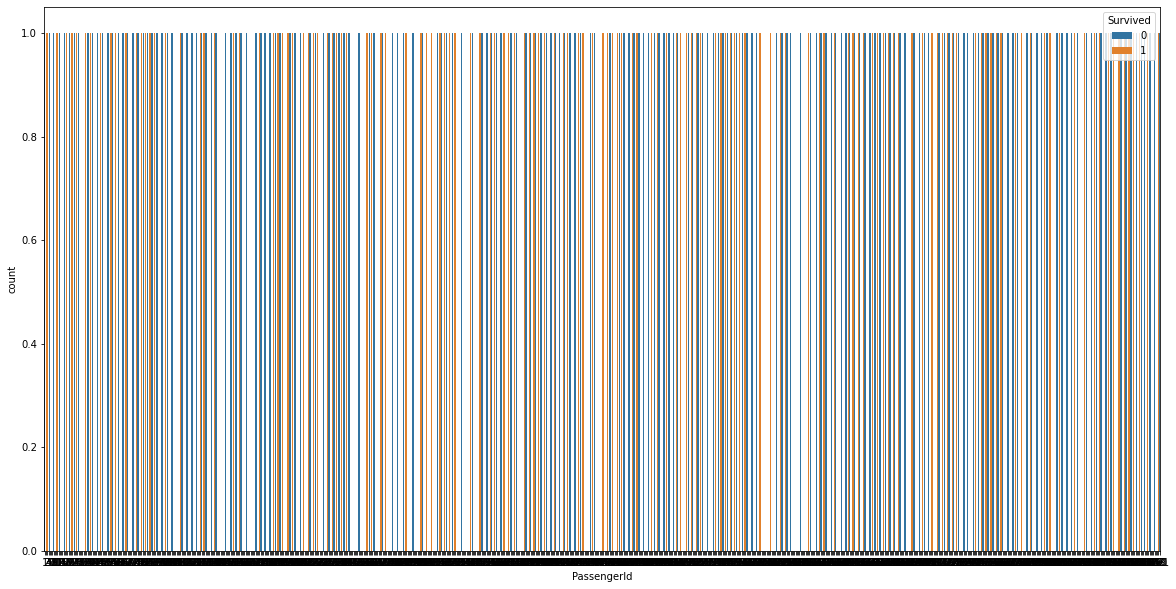

'PassengerId' is a 'bad Predictor'
p_val = 0.48423044114425606

Parch:


C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\1268197002.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop([i],1,inplace=True)


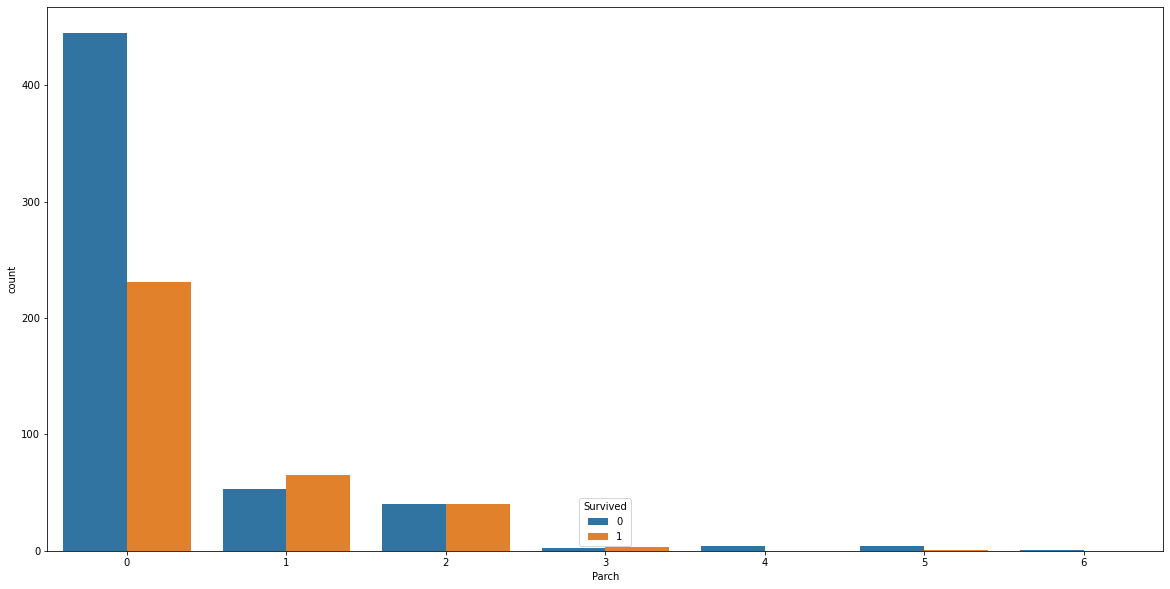

'Parch' is a 'Good Predictor'
p_val = 7.896496976051105e-05

Sex:


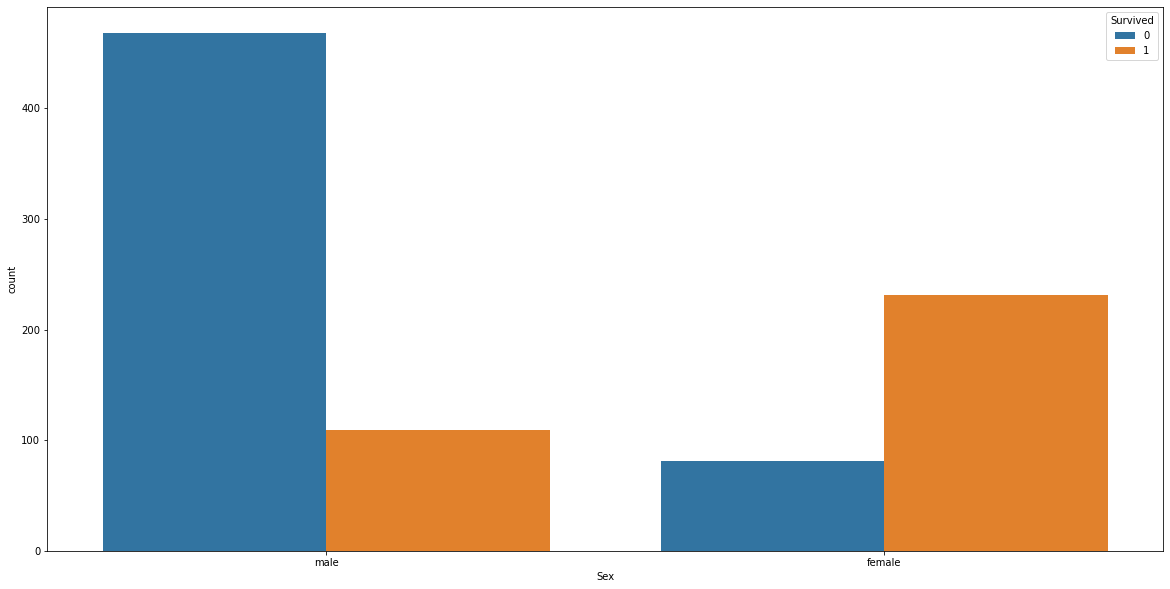

'Sex' is a 'Good Predictor'
p_val = 1.1739578304122022e-58

Name:


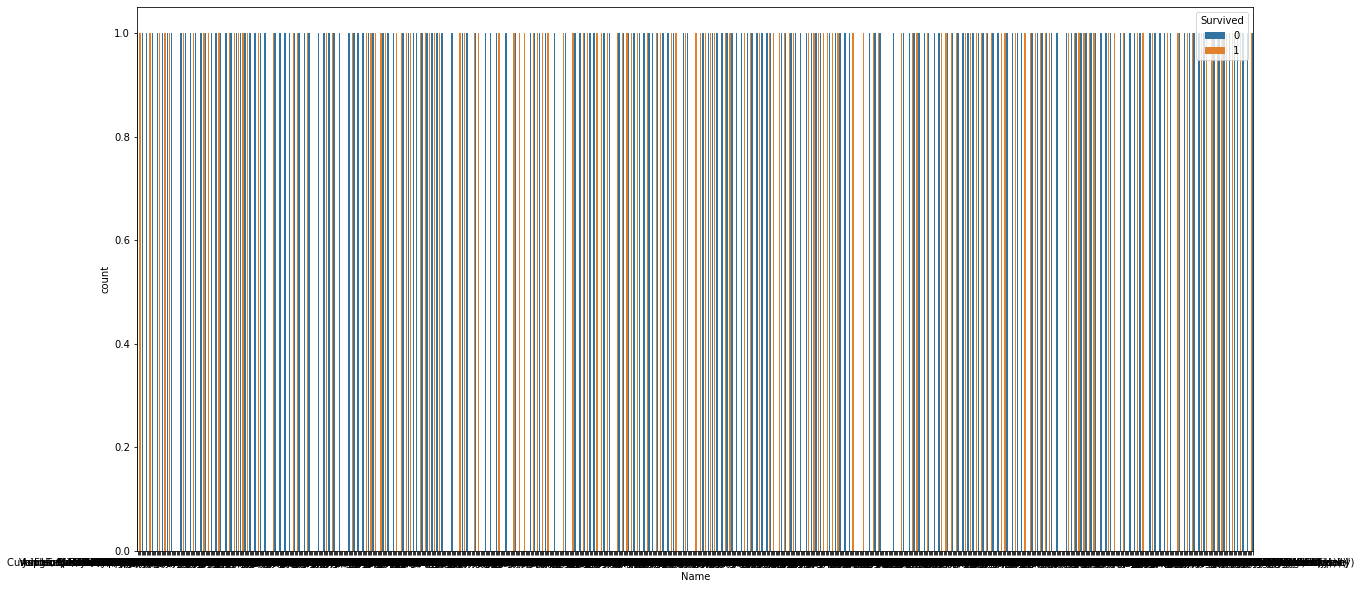

'Name' is a 'bad Predictor'
p_val = 0.48423044114425606

SibSp:


C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\1268197002.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop([i],1,inplace=True)


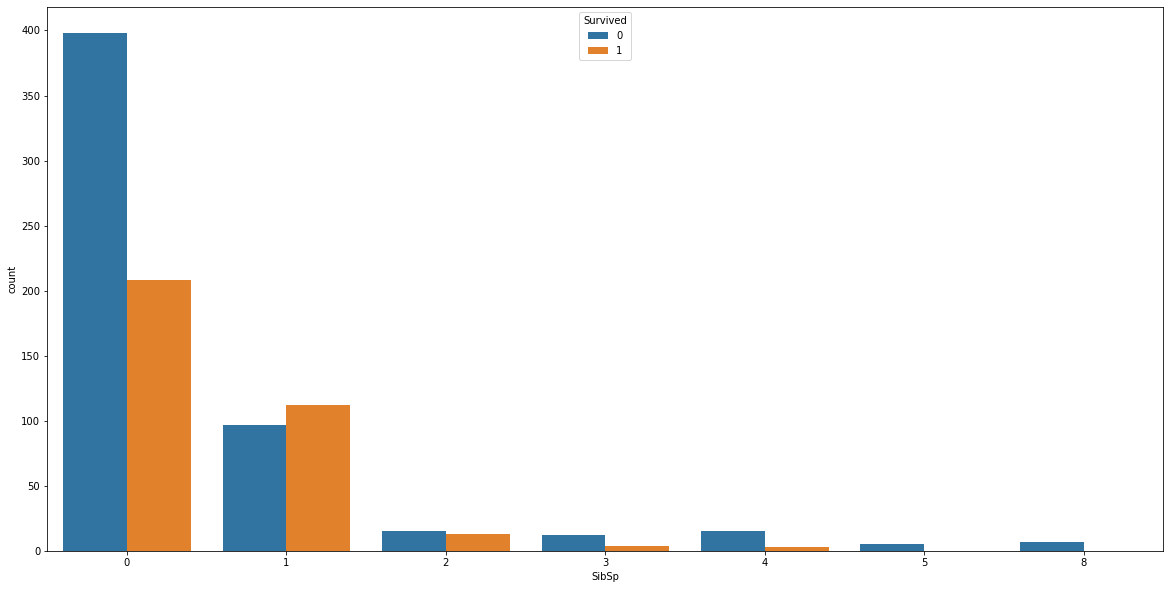

'SibSp' is a 'Good Predictor'
p_val = 1.262013627567703e-06



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore

for i in categorical:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.countplot(x=i,data=df,hue='Survived')
    plt.show()
    a=np.array(pd.crosstab(df.Survived,df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
        print("p_val = {}\n".format(p))
        df.drop([i],1,inplace=True)
    else:
        print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
        print("p_val = {}\n".format(p))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Ticket    889 non-null    object 
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.5+ KB


In [29]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,1,0,A/5 21171,7.250,S
1,1,1,female,1,0,PC 17599,65.000,C
2,1,3,female,0,0,STON/O2. 3101282,7.925,S
3,1,1,female,1,0,113803,53.100,S
4,0,3,male,0,0,373450,8.050,S


In [30]:
df_sex=pd.get_dummies(df.Sex,prefix='sex',drop_first=True)

In [31]:
df=pd.concat([df,df_sex],axis=1)

In [32]:
df

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,sex_male
0,0,3,male,1,0,A/5 21171,7.250,S,1
1,1,1,female,1,0,PC 17599,65.000,C,0
2,1,3,female,0,0,STON/O2. 3101282,7.925,S,0
3,1,1,female,1,0,113803,53.100,S,0
4,0,3,male,0,0,373450,8.050,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,211536,13.000,S,1
887,1,1,female,0,0,112053,30.000,S,0
888,0,3,female,1,2,W./C. 6607,23.450,S,0
889,1,1,male,0,0,111369,30.000,C,1


In [33]:
df.drop('Sex',1,inplace=True)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\771279747.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Sex',1,inplace=True)


In [34]:
df.drop('Ticket',1,inplace=True)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\1667937660.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Ticket',1,inplace=True)


In [35]:
df_embarked=pd.get_dummies(df.Embarked,prefix='Embarked',drop_first=True)

In [36]:
df=pd.concat([df,df_embarked],1)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\2247168866.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,df_embarked],1)


In [37]:
df

,Survived,Pclass,SibSp,Parch,Fare,Embarked,sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.250,S,1,0,1
1,1,1,1,0,65.000,C,0,0,0
2,1,3,0,0,7.925,S,0,0,1
3,1,1,1,0,53.100,S,0,0,1
4,0,3,0,0,8.050,S,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.000,S,1,0,1
887,1,1,0,0,30.000,S,0,0,1
888,0,3,1,2,23.450,S,0,0,1
889,1,1,0,0,30.000,C,1,0,0


In [38]:
df.drop('Embarked',1,inplace=True)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_14536\781827158.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Embarked',1,inplace=True)


In [39]:
df

,Survived,Pclass,SibSp,Parch,Fare,sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.250,1,0,1
1,1,1,1,0,65.000,0,0,0
2,1,3,0,0,7.925,0,0,1
3,1,1,1,0,53.100,0,0,1
4,0,3,0,0,8.050,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.000,1,0,1
887,1,1,0,0,30.000,0,0,1
888,0,3,1,2,23.450,0,0,1
889,1,1,0,0,30.000,1,0,0


# train and test split:

In [40]:
x=df.iloc[:,df.columns!='Survived']
y=df.iloc[:,df.columns=='Survived']
y=y.iloc[:,0]

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

# Model(logistic):

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression(random_state=123, solver='liblinear')
logmodel.fit(x_train,y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [46]:
predictions1 = logmodel.predict(x_train)

In [47]:
from sklearn.metrics import confusion_matrix


In [48]:
confusion_matrix(y_train,predictions1)

array([[315,  65],
       [ 72, 170]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_train,predictions1)


0.7797427652733119

In [51]:
predictions1

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [52]:
predictions2 = logmodel.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix


In [54]:
confusion_matrix(y_test,predictions2)

array([[145,  24],
       [ 30,  68]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,predictions2)


0.797752808988764

In [57]:
predictions2

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_train,predictions1))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       380
           1       0.72      0.70      0.71       242

    accuracy                           0.78       622
   macro avg       0.77      0.77      0.77       622
weighted avg       0.78      0.78      0.78       622



In [60]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       169
           1       0.74      0.69      0.72        98

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



# Model(DecisionTreeClassification):

In [61]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=123)

In [63]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [64]:
predict1=dt.predict(x_train)

In [65]:
dt.score(x_train,y_train)

0.9260450160771704

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_train,predict1)

0.9260450160771704

In [68]:
predict2=dt.predict(x_test)

In [69]:
dt.score(x_test,y_test)

0.7865168539325843

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,predict2)

0.7865168539325843

In [72]:
depth=[1,2,3,4,5,6,7,8,9,10]
acc_test=[]
acc_train=[]

In [73]:
for i in depth:
    model_bestfit=DecisionTreeClassifier(max_depth=i)
    model_bestfit.fit(x_train,y_train)
    predict_bestfit_train=model_bestfit.predict(x_train)
    predict_bestfit_test=model_bestfit.predict(x_test)
    acc_train.append(accuracy_score(y_train,predict_bestfit_train))
    acc_test.append(accuracy_score(y_test,predict_bestfit_test))

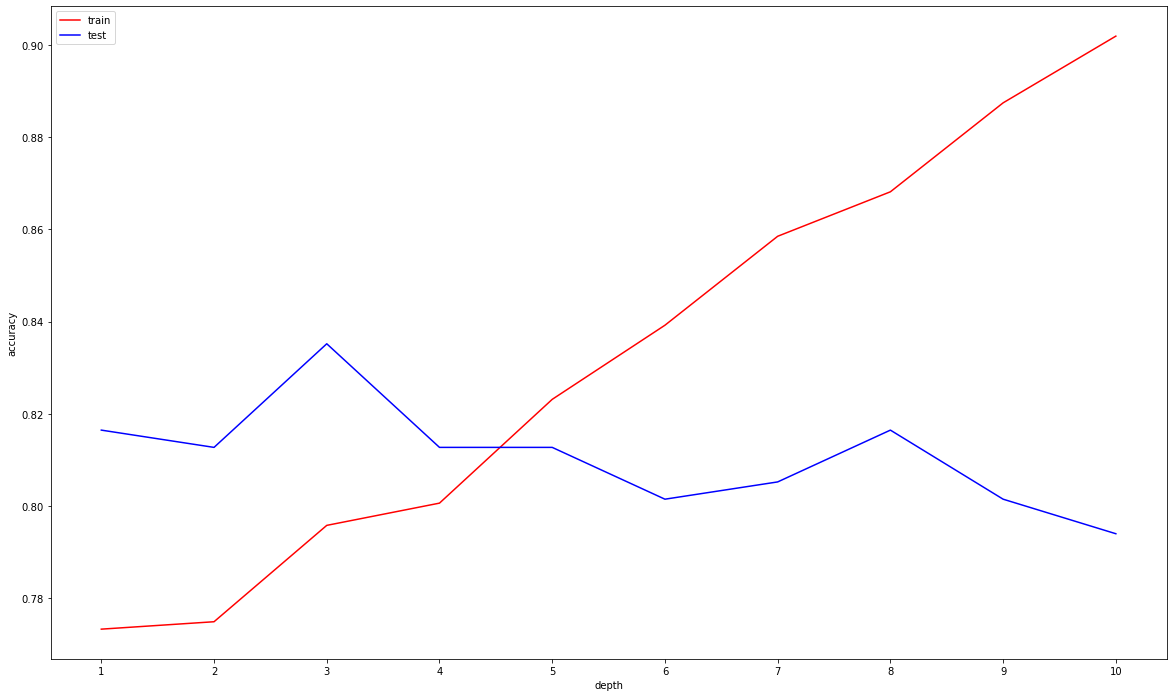

In [74]:
plt.figure(figsize=(20,12))
plt.plot(depth,acc_train,'red')
plt.plot(depth,acc_test,'blue')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1, 11, step=1))
plt.legend(['train','test'])
plt.show()

In [75]:
final1=DecisionTreeClassifier(max_depth=4)
final2=DecisionTreeClassifier(max_depth=5)

# depth-4:

In [76]:
final1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [77]:
final1_predict1=dt.predict(x_train)

In [78]:
final1.score(x_train,y_train)

0.8006430868167203

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_train,final1_predict1)

0.9260450160771704

In [81]:
a=accuracy_score(y_train,final1_predict1)

In [82]:
final1_predict2=dt.predict(x_test)

In [83]:
final1.score(x_test,y_test)

0.8127340823970037

In [84]:
accuracy_score(y_test,final1_predict2)

0.7865168539325843

In [85]:
b=accuracy_score(y_test,final1_predict2)

In [86]:
(b-a)*10000000

-1395281.6214458607

# depth-5:

In [87]:
final2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [88]:
final2_predict1=dt.predict(x_train)

In [89]:
final2.score(x_train,y_train)

0.8231511254019293

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_train,final2_predict1)

0.9260450160771704

In [92]:
a1=accuracy_score(y_train,final2_predict1)

In [93]:
final2_predict2=dt.predict(x_test)

In [94]:
final2.score(x_test,y_test)

0.8127340823970037

In [95]:
accuracy_score(y_test,final2_predict2)

0.7865168539325843

In [96]:
b1=accuracy_score(y_test,final2_predict2)

In [97]:
(b1-a1)*10000000

-1395281.6214458607

# SMOT:

In [98]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=123)

In [101]:
xr, yr= sm.fit_resample(x_train,y_train)

In [102]:
model4 = logmodel.fit(xr,yr)

In [103]:
y_pred_sm = model4.predict(x_test)

In [104]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       169
           1       0.72      0.73      0.73        98

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [105]:
len(y_train)

622

In [106]:
len(yr)

760